In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Loading**

In [71]:
df = pd.read_csv('diamonds.csv')
print(df.head(5))

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


# Data Inspection

In [121]:
df.info()
# price ->. target int
# carat -> weight of diamond
# color
# clarity -> how the diamond is clear object
# cut -> quality of cut (good ,     fair ... ., Premium) object
# depth
# table


<class 'pandas.core.frame.DataFrame'>
Index: 53134 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53134 non-null  float64
 1   cut      53134 non-null  object 
 2   color    53134 non-null  object 
 3   clarity  53134 non-null  object 
 4   depth    53134 non-null  object 
 5   table    53134 non-null  float64
 6   price    53134 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.2+ MB


In [122]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price
count,53134.000000,53134,53134,53134,53134.0,53134.000000,53134.000000
unique,NaN,5,8,8,185.0,NaN,NaN
top,NaN,ideal,G,SI1,62.0,NaN,NaN
freq,NaN,21032,11108,12936,2186.0,NaN,NaN
mean,0.802941,NaN,NaN,NaN,NaN,57.471308,3967.876332
std,0.473634,NaN,NaN,NaN,NaN,2.237218,3998.139395
min,0.200000,NaN,NaN,NaN,NaN,43.000000,-200.000000
25%,0.400000,NaN,NaN,NaN,NaN,56.000000,966.250000
50%,0.710000,NaN,NaN,NaN,NaN,57.000000,2450.000000
75%,1.050000,NaN,NaN,NaN,NaN,59.000000,5376.000000


# Data Cleaning

In [123]:
df.isna().sum()
# no null values

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

In [75]:
df.drop(['Unnamed: 0'] , axis=1, inplace=True)

In [114]:
# check duplicates :
# delete Duplicates
# df = df.drop_duplicates()

print(df.duplicated().sum())


0


In [133]:
df = df[df['price'] > 0]

In [100]:
df['clarity'].value_counts()

clarity
SI1     13030
VS2     12228
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
8           1
7y          1
vs2         1
Name: count, dtype: int64

In [156]:
df[df['color'] == '87']

,carat,cut,color,clarity,depth,table,price
619,0.71,premium,87,VS1,62.7,59.0,2839


In [108]:
# drop values
df.drop(index=1092 , inplace=True)
df.drop(index=205 , inplace=True)


In [154]:
df['color'].value_counts()

color
G     11108
E      9603
F      9395
H      8199
D      6648
I      5383
J      2796
87        1
Name: count, dtype: int64

In [157]:

df.drop(index=619 , inplace=True)


## Drop Redundent Columns

In [77]:
df = df.drop(columns=['x', 'y', 'z'])


In [85]:
df

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757


Handle Captial

In [89]:
# All uppercase
df['cut'] = df['cut'].str.lower()

# Visualization

## 1-D

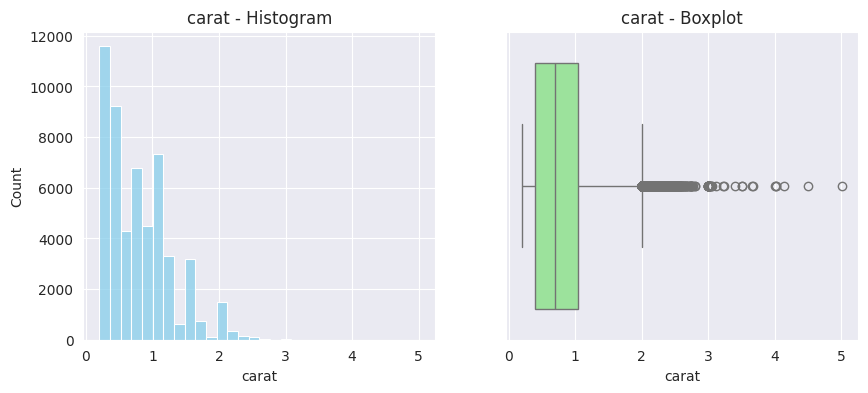

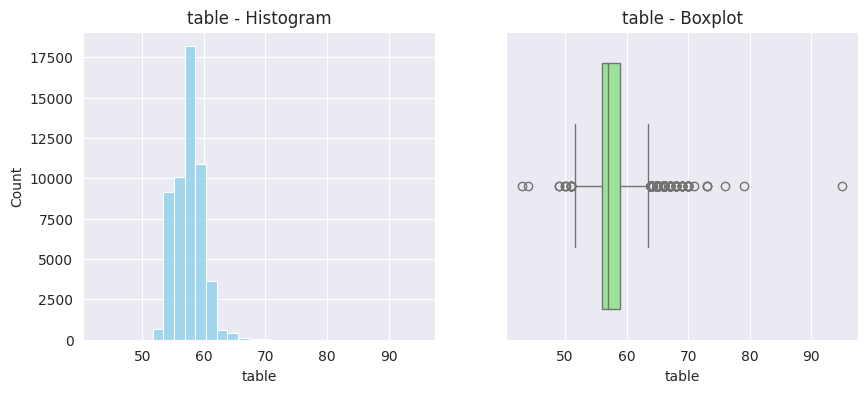

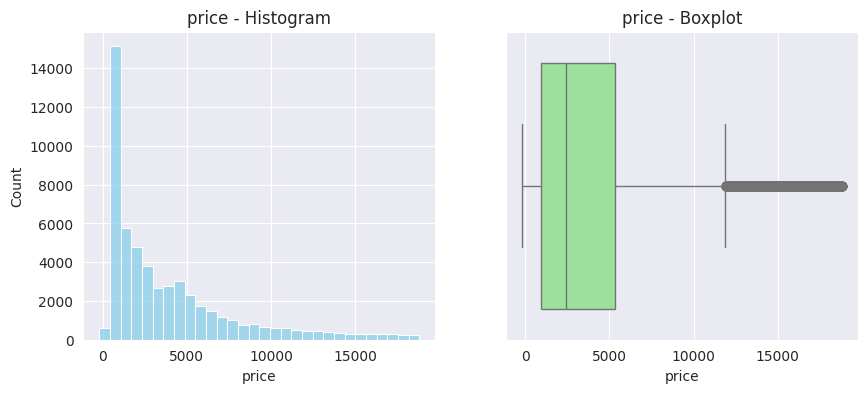

In [98]:
# for numerical : histogram , boxplot
numeric_cols = df.select_dtypes(['float64','int64']).columns


for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=df,x=col,ax=axes[0], color='skyblue', bins=30)
    axes[0].set_title(f'{col} - Histogram')
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'{col} - Boxplot')
    plt.show()


insights

Most of diamonds in range of 5000 dollars and 0 to 2 carat

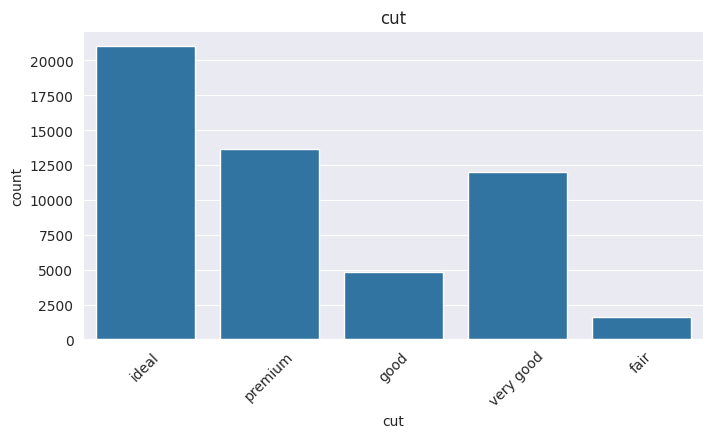

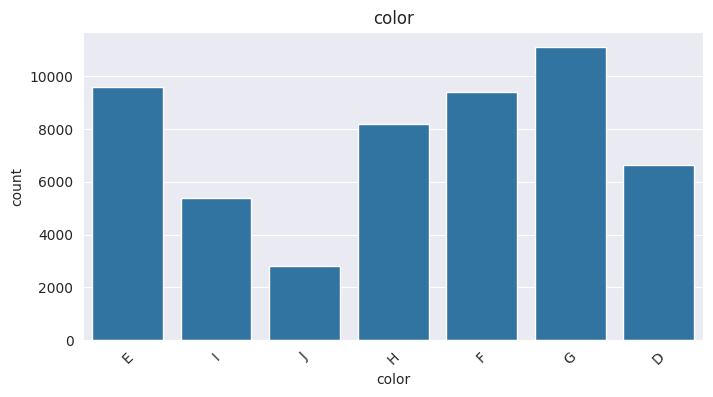

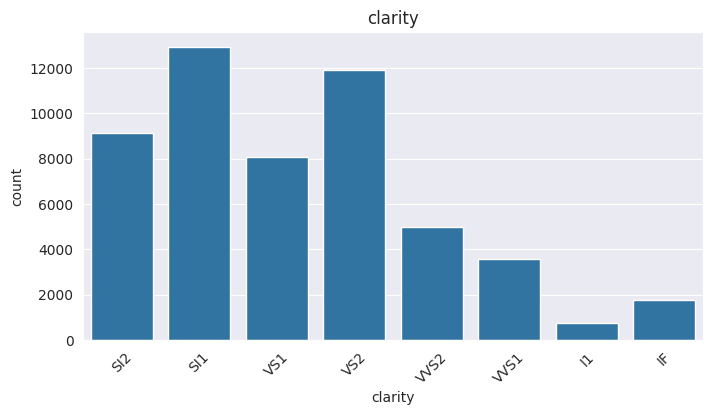

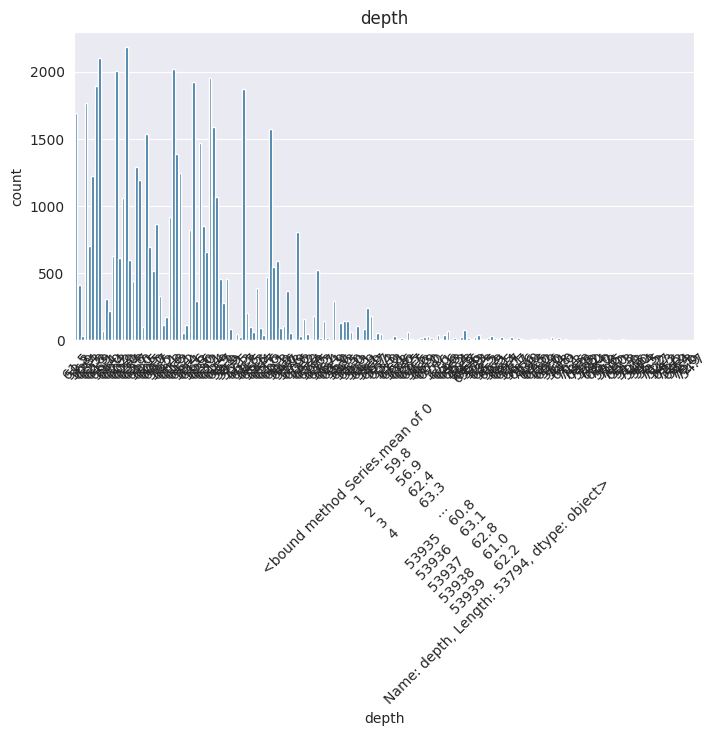

In [160]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'{col}')
    plt.show()

## 2-D

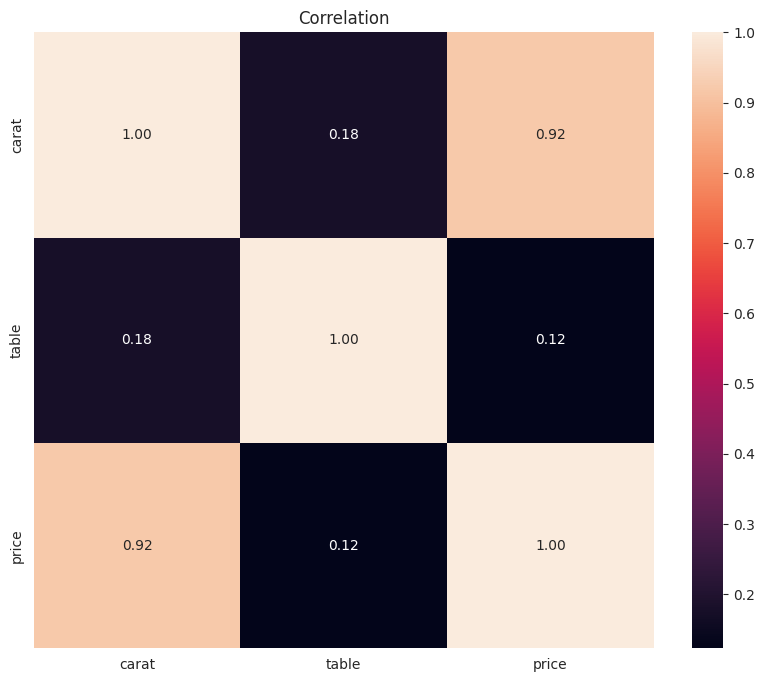

In [177]:
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation")
plt.show()

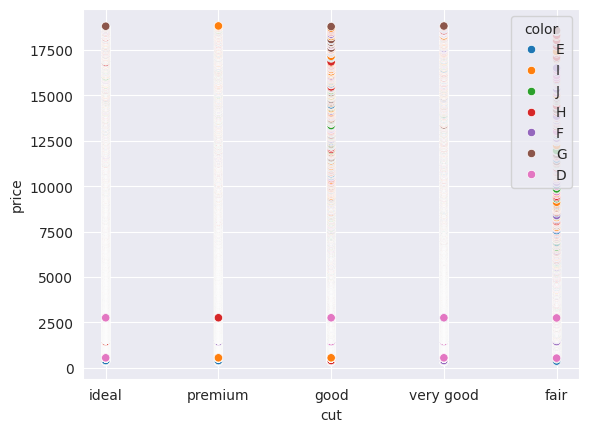

In [183]:
sns.scatterplot(data=df, x='carat', y='price',hue='color')
plt.show()

## 3-D

Text(0.5, 0, 'table')

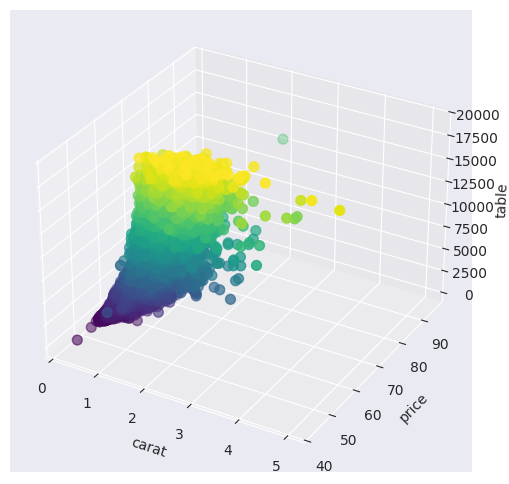

In [184]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot: X=carat, Y=table, Z=price
ax.scatter(df['carat'], df['table'], df['price'],
           c=df['price'], cmap='viridis', s=50)

# Labels
ax.set_xlabel('carat')
ax.set_ylabel('price')
ax.set_zlabel('table')


# Encoding


## Label Encoding -> ordinal (ordered data)

What it does:
Converts each category into a number (integer) by assigning an ID to each unique value.

In [167]:
from sklearn.preprocessing import LabelEncoder

In [169]:
le = LabelEncoder()
df['Color_Label'] = le.fit_transform(df['color'])

In [170]:
df

,carat,cut,color,clarity,depth,table,price,Color_Label
0,0.23,ideal,E,SI2,61.5,55.0,326,1
1,0.21,premium,E,SI1,59.8,61.0,326,1
2,0.23,good,E,VS1,56.9,65.0,327,1
3,0.29,premium,I,VS2,62.4,58.0,334,5
4,0.31,good,J,SI2,63.3,58.0,335,6
...,...,...,...,...,...,...,...,...
53935,0.72,ideal,D,SI1,60.8,57.0,2757,0
53936,0.72,good,D,SI1,63.1,55.0,2757,0
53937,0.70,very good,D,SI1,62.8,60.0,2757,0
53938,0.86,premium,H,SI2,61.0,58.0,2757,4


## One-Hot Encoding ->Nominal (not ordered)

Creates a new column for each category and puts 1 or 0 to indicate presence.

In [172]:
df_encoded = pd.get_dummies(df, columns=['color'])

In [174]:
print(df_encoded)

       carat        cut clarity depth  table  price  Color_Label  color_D  \
0       0.23      ideal     SI2  61.5   55.0    326            1    False   
1       0.21    premium     SI1  59.8   61.0    326            1    False   
2       0.23       good     VS1  56.9   65.0    327            1    False   
3       0.29    premium     VS2  62.4   58.0    334            5    False   
4       0.31       good     SI2  63.3   58.0    335            6    False   
...      ...        ...     ...   ...    ...    ...          ...      ...   
53935   0.72      ideal     SI1  60.8   57.0   2757            0     True   
53936   0.72       good     SI1  63.1   55.0   2757            0     True   
53937   0.70  very good     SI1  62.8   60.0   2757            0     True   
53938   0.86    premium     SI2  61.0   58.0   2757            4    False   
53939   0.75      ideal     SI2  62.2   55.0   2757            0     True   

       color_E  color_F  color_G  color_H  color_I  color_J  
0         Tru

# Scaling

## why scaling ?
### Many ML algorithms (like linear regression, kNN, SVM, neural networks) work better when numeric features are on a similar scale.
### Scaling also helps when:

### Features have very different ranges (e.g., age in years vs. income in thousands)

### Data has outliers or skewness


## **Prices and carat in my data is skewed , so we use : Power Transform**

## **table is standard distro : we use StandardScaler**


In [ ]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')

df['price'] = scaler.fit_transform(df[['price']])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['table'] = scaler.fit_transform(df[['table']])
